## Overview

The dataset contains a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. The dataset contains the following features/predictors and label/target.

This dataset has the following features:

1. Frequency, in Hertz
2. The angle of attack, in degrees
3. Chord length, in meters
4. Free-stream velocity, in meters per second
5. Suction side displacement thickness, in meters

The only target/label is:

* Scaled sound pressure level, in decibels

### Loading and cleaning up the dataset

In [1]:
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("airfoil_self_noise.dat",sep='\t', header=None, skiprows=0,
                 low_memory = False, skipinitialspace=True,
                 names=['Frequency(Hertz)',
                        'The angle of attack (degrees)',
                        'Chord length (m)',
                        'Free-stream velocity (m/sec)',
                        'Suction side displac. thickness (m)',
                        'Scaled sound press. (decibels)'])
df.head()

,Frequency(Hertz),The angle of attack (degrees),Chord length (m),Free-stream velocity (m/sec),Suction side displac. thickness (m),Scaled sound press. (decibels)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
df.dtypes

Frequency(Hertz)                         int64
The angle of attack (degrees)          float64
Chord length (m)                       float64
Free-stream velocity (m/sec)           float64
Suction side displac. thickness (m)    float64
Scaled sound press. (decibels)         float64
dtype: object

Next, let's check the missing values in the dataset.

In [4]:
df.isnull().sum(axis=0)

Frequency(Hertz)                       0
The angle of attack (degrees)          0
Chord length (m)                       0
Free-stream velocity (m/sec)           0
Suction side displac. thickness (m)    0
Scaled sound press. (decibels)         0
dtype: int64

### Summarizing the dataset.

In [5]:
df.describe()

,Frequency(Hertz),The angle of attack (degrees),Chord length (m),Free-stream velocity (m/sec),Suction side displac. thickness (m),Scaled sound press. (decibels)
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


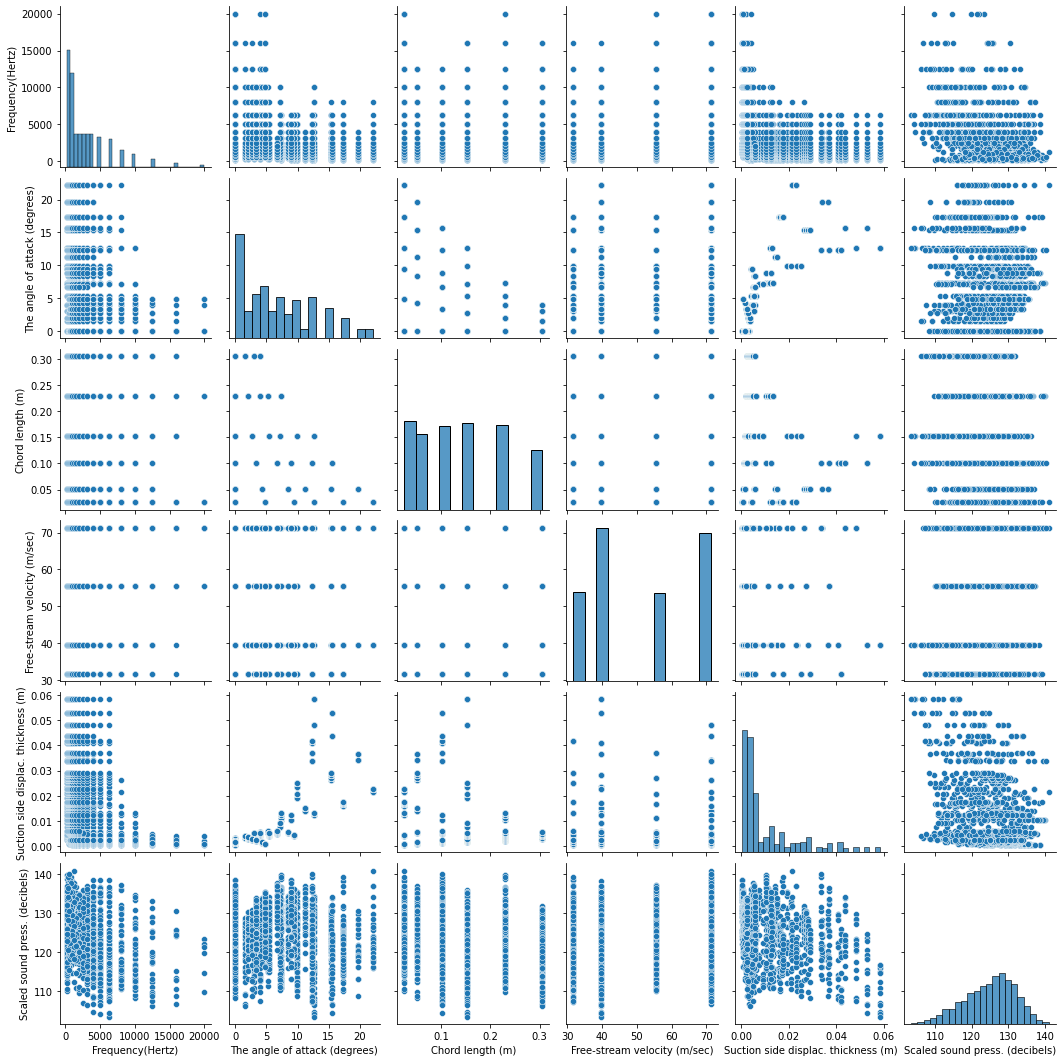

In [6]:
sns.pairplot(df)

<AxesSubplot:xlabel='Free-stream velocity (m/sec)', ylabel='Scaled sound press. (decibels)'>

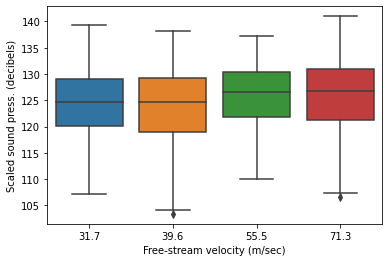

In [7]:
sns.boxplot(x='Free-stream velocity (m/sec)',y='Scaled sound press. (decibels)',data=df)

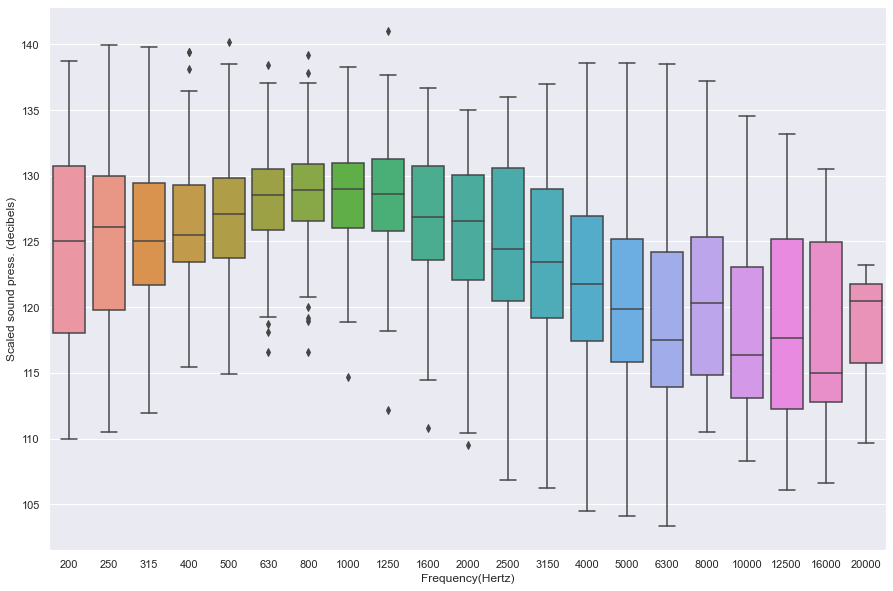

In [38]:
sns.boxplot(x='Frequency(Hertz)',y='Scaled sound press. (decibels)',data=df)
sns.set(rc={'figure.figsize':(15,10)})

### Building a simple linear regression to forecast "Scaled sound pressure level" using all other features and scikit-learn package.

In [9]:
# Spliting the data into 80% for training and 20% for test
X = df.drop('Scaled sound press. (decibels)',axis=1)
y = df['Scaled sound press. (decibels)'].astype(int)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

In [10]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m = m.fit(X_train, y_train)
y_pred = m.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('The root of mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred,squared = False)))
print('The mean absolute error is {0:.4f}'.format(mean_absolute_error(y_test,y_pred)))

The mean square error is 28.7813
The root of mean square error is 5.3648
The mean absolute error is 4.1195


### Preprocess the data using the normalization method to convert all features into the range of [0,1].

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building a deep learning regression model to forecast "Scaled sound pressure level" using all other features and TensorFlow. 

In [13]:
model = keras.Sequential()
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1))

In [14]:
model.compile(optimizer='adam',loss='mse')

In [15]:
tf.random.set_seed(1)
model.fit(x=X_train,y=y_train,batch_size=32,epochs=100,
          validation_data=(X_test,y_test))

Epoch 1/100
38/38 [==============================] - 1s 5ms/step - loss: 15541.9033 - val_loss: 15356.1064
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 15524.1992 - val_loss: 15337.4023
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 15504.6123 - val_loss: 15315.9072
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 15481.5137 - val_loss: 15290.3242
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 15454.1162 - val_loss: 15260.1094
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 15422.2598 - val_loss: 15225.3076
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 15385.8721 - val_loss: 15186.0967
Epoch 8/100
38/38 [==============================] - 0s 3ms/step - loss: 15345.0586 - val_loss: 15142.3457
Epoch 9/100
38/38 [==============================] - 0s 3ms/step - loss: 15299.7441 - val_loss: 15094.0449
Epoch 10/100
38/38 [=================

38/38 [==============================] - 0s 3ms/step - loss: 3172.0715 - val_loss: 2938.9397
Epoch 78/100
38/38 [==============================] - 0s 3ms/step - loss: 3050.1621 - val_loss: 2821.5879
Epoch 79/100
38/38 [==============================] - 0s 3ms/step - loss: 2932.3125 - val_loss: 2709.6064
Epoch 80/100
38/38 [==============================] - 0s 3ms/step - loss: 2819.0454 - val_loss: 2601.4497
Epoch 81/100
38/38 [==============================] - 0s 3ms/step - loss: 2709.8604 - val_loss: 2498.4255
Epoch 82/100
38/38 [==============================] - 0s 3ms/step - loss: 2605.2192 - val_loss: 2399.2356
Epoch 83/100
38/38 [==============================] - 0s 3ms/step - loss: 2504.9050 - val_loss: 2303.4668
Epoch 84/100
38/38 [==============================] - 0s 3ms/step - loss: 2408.5071 - val_loss: 2213.4534
Epoch 85/100
38/38 [==============================] - 0s 3ms/step - loss: 2316.5969 - val_loss: 2126.3789
Epoch 86/100
38/38 [==============================] - 0s 3m

In [16]:
X_train.shape

(1202, 5)

In [17]:
y_pred2 = model.predict(X_test)

In [18]:
print('The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred2)))
print('The root of mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred2,squared = False)))
print('The mean absolute error is {0:.4f}'.format(mean_absolute_error(y_test,y_pred2)))

The mean square error is 1272.2526
The root of mean square error is 35.6687
The mean absolute error is 29.1698


### Improving the model performance by adjusting the number of neurons.

In [19]:
model_test = keras.Sequential()
model_test.add(layers.Dense(4, activation='relu'))
model_test.add(layers.Dense(1))

In [20]:
model_test.compile(optimizer='adam',loss='mse')

In [21]:
tf.random.set_seed(1)
model_test.fit(x=X_train,y=y_train,batch_size=32,epochs=100,
          validation_data=(X_test,y_test))

Epoch 1/100
38/38 [==============================] - 0s 4ms/step - loss: 15549.7520 - val_loss: 15355.4023
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 15514.2217 - val_loss: 15318.8193
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 15474.0703 - val_loss: 15275.6279
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 15424.9531 - val_loss: 15221.1748
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 15362.2666 - val_loss: 15148.5381
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 15281.7354 - val_loss: 15058.6191
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 15187.4014 - val_loss: 14958.7207
Epoch 8/100
38/38 [==============================] - 0s 3ms/step - loss: 15084.3193 - val_loss: 14851.2012
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 14973.2842 - val_loss: 14734.7129
Epoch 10/100
38/38 [=================

Epoch 78/100
38/38 [==============================] - 0s 3ms/step - loss: 1055.6478 - val_loss: 989.3239
Epoch 79/100
38/38 [==============================] - 0s 3ms/step - loss: 1038.1825 - val_loss: 976.2830
Epoch 80/100
38/38 [==============================] - 0s 3ms/step - loss: 1022.8585 - val_loss: 964.4362
Epoch 81/100
38/38 [==============================] - 0s 3ms/step - loss: 1008.9570 - val_loss: 954.0200
Epoch 82/100
38/38 [==============================] - 0s 3ms/step - loss: 996.5391 - val_loss: 944.2887
Epoch 83/100
38/38 [==============================] - 0s 3ms/step - loss: 985.4012 - val_loss: 935.9064
Epoch 84/100
38/38 [==============================] - 0s 3ms/step - loss: 975.2045 - val_loss: 928.3152
Epoch 85/100
38/38 [==============================] - 0s 2ms/step - loss: 966.0643 - val_loss: 921.4567
Epoch 86/100
38/38 [==============================] - 0s 3ms/step - loss: 957.5213 - val_loss: 915.1811
Epoch 87/100
38/38 [==============================] - 0s 3ms

In [22]:
y_pred_test = model_test.predict(X_test)

In [23]:
print('The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred_test)))
print('The root of mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred_test,squared = False)))
print('The mean absolute error is {0:.4f}'.format(mean_absolute_error(y_test,y_pred_test)))

The mean square error is 845.3903
The root of mean square error is 29.0756
The mean absolute error is 23.7675


### Trying it with Pytorch 

In [24]:
X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.float32).reshape(-1,1))

In [25]:
y_train.shape

torch.Size([1202, 1])

In [26]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
hidden_size = 4
print(input_size)
print(output_size)

5
1


In [27]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.hidden = torch.nn.Linear(input_size, hidden_size)  
        self.predict = torch.nn.Linear(hidden_size, output_size)  
    def forward(self, x):
        x = F.relu(self.hidden(x))     
        y_pred = self.predict(x)            
        return y_pred

In [28]:
model = LinearRegressionModel(input_size, hidden_size, output_size)
l = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

In [29]:
torch.manual_seed(1)
np.random.seed(0)
num_epochs = 100
for epoch in range(num_epochs):
    y_pred = model(X_train.requires_grad_())
    loss= l(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {0}, loss:{1:.4f}'.format(epoch, loss.item()))

epoch 0, loss:15423.7754
epoch 1, loss:15393.2695
epoch 2, loss:15359.2676
epoch 3, loss:15318.4688
epoch 4, loss:15269.7773
epoch 5, loss:15214.9834
epoch 6, loss:15153.9863
epoch 7, loss:15086.6289
epoch 8, loss:15012.7568
epoch 9, loss:14932.2109
epoch 10, loss:14844.8389
epoch 11, loss:14750.4795
epoch 12, loss:14648.9863
epoch 13, loss:14540.2178
epoch 14, loss:14424.0420
epoch 15, loss:14300.3398
epoch 16, loss:14169.0020
epoch 17, loss:14029.9404
epoch 18, loss:13883.0762
epoch 19, loss:13728.3496
epoch 20, loss:13565.7217
epoch 21, loss:13395.1748
epoch 22, loss:13216.7051
epoch 23, loss:13030.3398
epoch 24, loss:12836.1230
epoch 25, loss:12634.1299
epoch 26, loss:12424.4570
epoch 27, loss:12207.2256
epoch 28, loss:11982.5879
epoch 29, loss:11750.7256
epoch 30, loss:11511.8428
epoch 31, loss:11266.1797
epoch 32, loss:11014.0020
epoch 33, loss:10755.6035
epoch 34, loss:10491.3174
epoch 35, loss:10221.4971
epoch 36, loss:9946.5312
epoch 37, loss:9666.8340
epoch 38, loss:9382.8564

In [30]:
X_test = torch.from_numpy(X_test.astype(np.float32))
y_pred = model(X_test).detach().numpy()

In [31]:
print('The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('The root of mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred,squared = False)))
print('The mean absolute error is {0:.4f}'.format(mean_absolute_error(y_test,y_pred)))

The mean square error is 911.9756
The root of mean square error is 30.1989
The mean absolute error is 24.9964


### Improving the model performance by adjusting the number of neurons.

In [32]:
input_size2 = X_train.shape[1]
output_size2 = y_train.shape[1]
hidden_size2 = 5
print(input_size)
print(output_size)

5
1


In [33]:
class LinearRegressionModel2(torch.nn.Module):
    def __init__(self, input_size2, hidden_size2, output_size2):
        super(LinearRegressionModel2, self).__init__()
        self.hidden = torch.nn.Linear(input_size2, hidden_size2)  
        self.predict = torch.nn.Linear(hidden_size2, output_size2)  
    def forward(self, x):
        x = F.relu(self.hidden(x))     
        y_pred2 = self.predict(x)            
        return y_pred2

In [34]:
model = LinearRegressionModel(input_size2, hidden_size2, output_size2)
optimizer2 = torch.optim.Adam(model.parameters(), lr=0.05)

In [35]:
torch.manual_seed(1)
np.random.seed(0)
num_epochs = 100
for epoch in range(num_epochs):
    y_pred2 = model(X_train.requires_grad_())
    loss= l(y_pred2, y_train)
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    print('epoch {0}, loss:{1:.4f}'.format(epoch, loss.item()))

epoch 0, loss:15547.6338
epoch 1, loss:15492.6094
epoch 2, loss:15432.3477
epoch 3, loss:15364.1777
epoch 4, loss:15287.0234
epoch 5, loss:15200.8418
epoch 6, loss:15105.4131
epoch 7, loss:15000.5312
epoch 8, loss:14885.9971
epoch 9, loss:14761.6318
epoch 10, loss:14627.2578
epoch 11, loss:14482.7188
epoch 12, loss:14327.8701
epoch 13, loss:14162.5957
epoch 14, loss:13986.7939
epoch 15, loss:13800.3945
epoch 16, loss:13603.3564
epoch 17, loss:13395.6680
epoch 18, loss:13177.3564
epoch 19, loss:12948.4814
epoch 20, loss:12709.1484
epoch 21, loss:12459.4990
epoch 22, loss:12199.7236
epoch 23, loss:11930.0576
epoch 24, loss:11650.7842
epoch 25, loss:11362.2383
epoch 26, loss:11064.8086
epoch 27, loss:10758.9316
epoch 28, loss:10445.1035
epoch 29, loss:10123.8730
epoch 30, loss:9795.8428
epoch 31, loss:9461.6719
epoch 32, loss:9122.0811
epoch 33, loss:8777.8340
epoch 34, loss:8429.7568
epoch 35, loss:8078.7246
epoch 36, loss:7725.6587
epoch 37, loss:7371.5293
epoch 38, loss:7017.3511
epoch

In [36]:
y_pred2 = model(X_test).detach().numpy()

In [37]:
print('The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred2)))
print('The root of mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred2,squared = False)))
print('The mean absolute error is {0:.4f}'.format(mean_absolute_error(y_test,y_pred2)))

The mean square error is 802.8494
The root of mean square error is 28.3346
The mean absolute error is 23.2402
